In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NFLX_stock.csv to NFLX_stock (5).csv


In [ ]:
df=pd.read_csv("NFLX_stock.csv")
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,501.619995,506.799988,493.500000,503.380005,503.380005,3028400
1,2020-12-03,502.989990,508.769989,496.040009,497.519989,497.519989,2826100
2,2020-12-04,497.500000,504.500000,493.640015,498.309998,498.309998,3666200
3,2020-12-07,500.010010,517.760010,497.769989,515.780029,515.780029,4289300
4,2020-12-08,517.900024,521.489990,505.549988,512.659973,512.659973,4229000
5,2020-12-09,510.529999,514.500000,491.290009,493.600006,493.600006,4178800


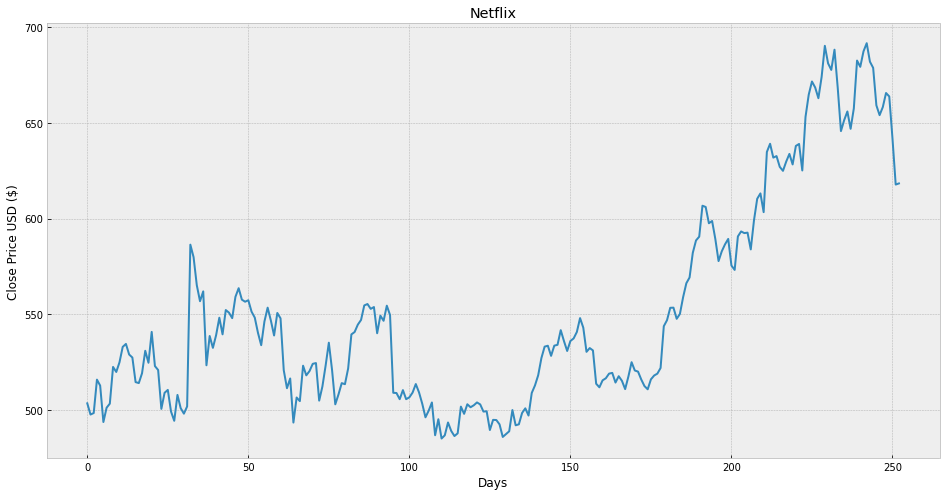

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()


In [ ]:
df.drop(['Adj Close'],axis=1,inplace=True)
df['Date']=pd.to_datetime(df.Date)
df.dtypes
# df.head()

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
X=df[['Open','High','Low','Volume']]
y=df['Close']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [ ]:
# tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)

In [ ]:
# x_future = df.drop(['Prediction'],1)[:-future_days]
# x_future = x_future.tail(future_days)
# x_future = np.array(x_future)
# x_future
print(y_test)

53     540.219971
13     528.909973
144    528.210022
94     549.570007
158    513.630005
71     524.440002
85     546.989990
35     556.780029
3      515.780029
118    502.899994
189    588.549988
54     533.780029
91     549.219971
77     502.859985
65     506.440002
10     524.830017
244    678.799988
41     548.159973
74     523.109985
250    641.900024
226    668.520020
182    553.409973
93     554.440002
109    495.079987
227    662.919983
246    654.059998
128    492.390015
84     544.530029
24     508.890015
30     497.980011
64     493.329987
241    687.400024
127    494.660004
20     540.729980
28     507.790009
180    546.880005
131    488.769989
90     540.020020
126    494.739990
101    509.000000
221    639.000000
220    637.969971
23     500.489990
222    625.140015
208    610.340027
14     527.330017
29     500.859985
225    671.659973
18     530.869995
169    524.890015
214    632.659973
Name: Close, dtype: float64


In [ ]:
# tree_prediction = tree.predict(x_future)
# print(tree_prediction)
# print()
from sklearn.metrics import accuracy_score
y_prediction=lr.predict(x_test)
print(y_prediction)



[541.7517802  525.30928929 529.09635696 556.11907099 513.66055971
 520.81094341 547.20447109 554.34387633 511.88959    503.17985285
 596.11703324 537.3343812  550.72642882 501.60064608 509.6415756
 524.47935034 679.35015727 550.1141683  524.59551082 649.5149979
 667.20921139 553.43733232 553.91845577 492.98645572 665.6160718
 654.31640465 492.62552677 551.44710769 513.76557032 501.78238722
 499.41801654 685.44687351 494.74922469 539.01844288 506.63972004
 545.5780527  490.37057593 541.58085292 499.30412506 502.69333108
 637.77155465 627.79684549 503.19431093 628.82946232 617.71207645
 524.28859268 506.83719034 667.78096596 529.01115723 521.39408528
 639.4092516 ]


In [ ]:
import pickle
pickle.dump(lr,open('lr_model.pkl','wb'))
